In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset into python environment

In [4]:
path_to_dataset = r"C:\Users\Muhammed Ashik.A\Downloads\titanic_dataset.csv"
df = pd.read_csv(path_to_dataset)

# Make ‘PassengerId’ as the index column


In [5]:
df.set_index('PassengerId', inplace=True)

# Check the basic details of the dataset

In [7]:
print("Basic details of the dataset:")
print(df.info())

Basic details of the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


In [8]:
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


# Fill in all the missing values present in all the columns in the dataset

In [9]:
print("\nHandling missing values:")
print("Number of missing values in each column:")
print(df.isnull().sum())


Handling missing values:
Number of missing values in each column:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [10]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [11]:
df['Cabin'].fillna('Unknown', inplace=True)

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [13]:
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [20]:
print(df)

             Survived  Pclass  \
PassengerId                     
1                   0     1.0   
2                   1     0.0   
3                   1     1.0   
4                   1     0.0   
5                   0     1.0   
...               ...     ...   
887                 0     0.5   
888                 1     0.0   
889                 0     1.0   
890                 1     0.0   
891                 0     1.0   

                                                          Name     Sex  \
PassengerId                                                              
1                                      Braund, Mr. Owen Harris    male   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
3                                       Heikkinen, Miss. Laina  female   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
5                                     Allen, Mr. William Henry    male   
...                                                 

# Check and handle outliers in at least 3 columns in the dataset

In [14]:
print("\nHandling outliers:")


Handling outliers:


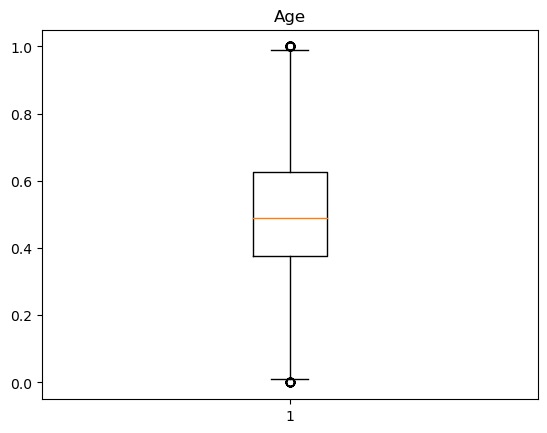

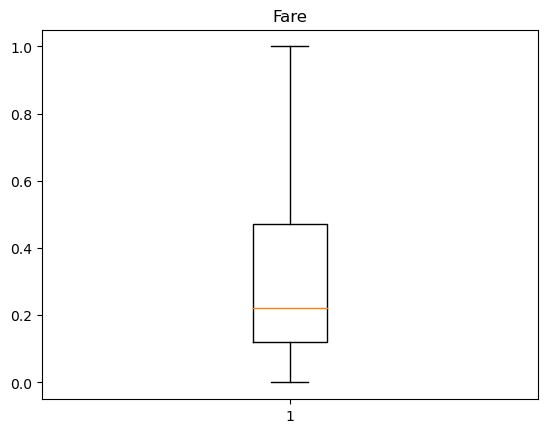

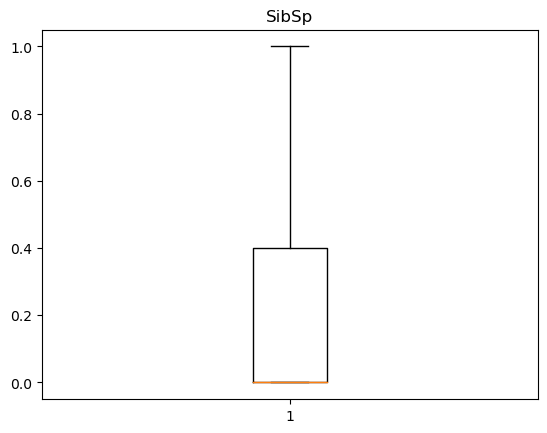

In [21]:
import matplotlib.pyplot as plt

plt.boxplot(df['Age'].dropna())
plt.title('Age')
plt.show()


plt.boxplot(df['Fare'].dropna())
plt.title('Fare')
plt.show()


plt.boxplot(df['SibSp'])
plt.title('SibSp')
plt.show()

# min max scaling on the feature set

In [18]:
scaler = MinMaxScaler()
df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

In [24]:
print("Updated DataFrame:")
print(df.head())


print("Scaled feature set:")
print(df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

Updated DataFrame:
             Survived  Pclass  \
PassengerId                     
1                   0     1.0   
2                   1     0.0   
3                   1     1.0   
4                   1     0.0   
5                   0     1.0   

                                                          Name     Sex  \
PassengerId                                                              
1                                      Braund, Mr. Owen Harris    male   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
3                                       Heikkinen, Miss. Laina  female   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
5                                     Allen, Mr. William Henry    male   

                  Age  SibSp  Parch            Ticket      Fare    Cabin  \
PassengerId                                                                
1            0.375000    0.4    0.0         A/5 21171  0.110460  Unknown   
2 